<a href="https://colab.research.google.com/github/gaetanocmr/OpenSeesPyTools/blob/master/dxf2frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A "simple" way to import dxf in python for *Openseespy* analysis
## Scope:
Sometimes you need to define nodes and elements for structures. 
Defining this object could be challenging, especially in case of 3D structures, or in case of huge number of nodes. <br>
In this Colab Notebook I would like to share a "simple" way to import a .dxf file and analyze the structure using *Openseespy*.
The following frame will be a 2D frame, where all *z coordinates* = 0, but the code could be easily adapted for 3D structures.
<hr>

## Basic things:
* A little python knowledge
* Install *ezdxf* module ([learn more](https://ezdxf.mozman.at/))

## Steps:
* [Install module](#install)
* [Import module](#import)
* [load .dxf file](#load)
* [Query entities](#query)
* [A way to read attributes](#attributes)
* [Simple way of access to value](#value)
* [Structure Analysis with *Openseespy*](#analysis)
    * [Extract nodes and connectivity](#extract)
    * [Define model in Opensees](#opensees)
    * [PlotFrame function](#plotframe)
    * [Results](#results)
* [Considerations](#considerations)

<hr/>

#### ezdxf Documentation:
Documentation can be found at: https://ezdxf.readthedocs.io/
<hr/>

**Collabs are appreciated** <br>
*Copyright holder: Gaetano Camarda (2020) gaetano.camarda@outlook.com* <br>
<font size="0.5">Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: <br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. <br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</font>



<a id = "install" />
<hr>

#### Install module

In [ ]:
pip install ezdxf

<a id = "import" />
<hr/>

#### Import module

In [ ]:
import ezdxf

<a id = "load" />
<hr/>

#### load .dxf:

In [ ]:
doc = ezdxf.readfile("/content/sample_data/draw.dxf")
msp = doc.modelspace()

<a id = "query" />
<hr/>

#### Query

There are many query options ([learn more](https://ezdxf.readthedocs.io/en/stable/tutorials/getting_data.html#entity-queries)). <br/> In this case the .dxf contains only 'LINE', so we will retrieve LINE object and it's start and end point.

In [ ]:
lines = msp.query('LINE')
type(lines)

ezdxf.query.EntityQuery

<a id = "attributes" />
<hr/>

### A way to read attributes
In the following cell is shown a way to retrieve attributes from 'LINE'. <br>
A "save_entity" method is defined to retrieve start and end point of each line. An empty list "el" that will contains all the data is initialized and in the end the for cycle will fullfil the list.

In [ ]:
def save_entity(e):
    p1 = e.dxf.start
    p2 = e.dxf.end
    return p1, p2

el = [] # el stands for element
for e in msp.query('LINE'):
    el.append(save_entity(e))

<a id = "value" />
<hr/>

### Simple way to access value
The information of each line are inside a tuple object (so they are immutable) and they are saved inside the "el" list (list are mutable). <br>
A simple way to see the data inside the list "el" is explained here:


In [ ]:
for ind, value in enumerate(el):
    print(ind, value)

0 (Vector(0.0, 0.0, 0.0), Vector(1e-16, 1.0, 0.0))
1 (Vector(1e-16, 1.0, 0.0), Vector(1.0, 1.0, 0.0))
2 (Vector(1.0, 1.0, 0.0), Vector(0.9999999999999998, 0.0, 0.0))
3 (Vector(1.0, 1.0, 0.0), Vector(2.0, 1.0, 0.0))
4 (Vector(2.0, 1.0, 0.0), Vector(1.999999999999999, 0.0, 0.0))
5 (Vector(2e-16, 1.0, 0.0), Vector(3e-16, 2.0, 0.0))
6 (Vector(3e-16, 2.0, 0.0), Vector(1.0, 2.0, 0.0))
7 (Vector(1.0, 2.0, 0.0), Vector(1.0, 1.0, 0.0))
8 (Vector(1.0, 2.0, 0.0), Vector(2.0, 2.0, 0.0))
9 (Vector(2.0, 2.0, 0.0), Vector(1.999999999999999, 1.0, 0.0))
10 (Vector(2.0, 2.0, 0.0), Vector(3.0, 2.0, 0.0))
11 (Vector(3.0, 2.0, 0.0), Vector(3.0, 1.0, 0.0))
12 (Vector(3.0, 1.0, 0.0), Vector(2.0, 1.0, 0.0))
13 (Vector(2.0, 2.0, 0.0), Vector(2.0, 3.0, 0.0))
14 (Vector(2.0, 3.0, 0.0), Vector(1.0, 2.0, 0.0))
15 (Vector(3.0, 2.0, 0.0), Vector(2.0, 3.0, 0.0))


As you can see, "el" contains vectors (tuple) that define 2 points (with x,y,z coordinates) for each line. <br>
For example we would like to access to line 3, start point, x coordinate:

In [ ]:
el[3][1][0]

2.0

3 = third element of list "el" <br>
1 = second vector object (end point of the line) <br>
0 = x coordinate of the point <br>

<a id = "analysis" />

<hr/>

### Structure Analysis with *Openseespy*
#### Structure:
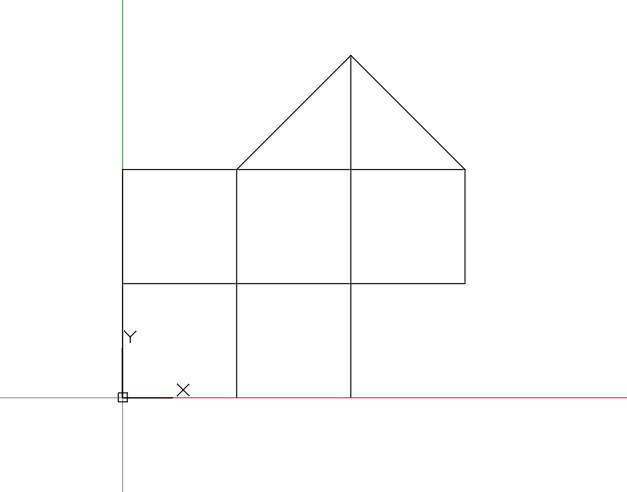

Each beam of the structure has almost same length. <br>
$ L_b = 1 [L] $ <br>
$ E = 1  [F/L^2] $ <br>
$ A = 1 [L^2] $ <br>
$ I_z = 1 [L^4] $ <br>
$ Load = -1 [F/L] $ (on element 12)


In [ ]:
pip install openseespy

     |████████████████████████████████| 34.2MB 121kB/s 


<a id = "extract" />
<hr/>

### Extract nodes and connectivity
The following section will show a way to extract nodes and connectivity needed in openseespy framework

In [ ]:
# Copyright Gaetano Camarda
# 2020 V_1
# gaetano.camarda@outlook.com

# Define Nodes
def node_extract(el, length): 
    nodes = []
    for i in range(length):
        nodes.append(el[i][0])
        nodes.append(el[i][1])
    return nodes

def removeDuplicates(nodes): 
    return [t for t in (set(tuple(i) for i in nodes))]

el_new = []
for i, value in enumerate(el): # Round nodes values
    tmp = [[round(ezdxf.math.xround(value[0][0], 0.001),2), \
            round(ezdxf.math.xround(value[0][1], 0.001),2), \
            round(ezdxf.math.xround(value[0][2], 0.001),2)], \
           [round(ezdxf.math.xround(value[1][0], 0.001),2), \
            round(ezdxf.math.xround(value[1][1], 0.001),2), \
            round(ezdxf.math.xround(value[1][2], 0.001),2)]]
    el_new.append(tmp)

def connectivity(el_new, nodes):
    c = []
    d = []
    for i in range(len(el_new)):
        for j in range(len(nodes)):
            if el_new[i][1] == list(nodes[j]):
                c.append(j)
            elif el_new[i][0] == list(nodes[j]):
                d.append(j)
    return c, d

nodes = removeDuplicates(node_extract(el_new, len(el_new))) # Define nodelist for Openseespy <----
connect = connectivity(el_new, nodes) # Define connectivity for each element <----

<a id = "opensees" />
<hr/>

### Define model in Opensees

In [ ]:
import openseespy.postprocessing.Get_Rendering as rend
import openseespy.opensees as ops

# remove existing model
ops.wipe()

# set modelbuilder
ops.model('basic', '-ndm', 2, '-ndf', 3)

# Define node in Openseespy
for i, value in enumerate(nodes):
    ops.node(i, value[0], value[1])
ops.printModel('-node')


 Node: 0
	Coordinates  : 3 2 


 Node: 1
	Coordinates  : 1 1 


 Node: 2
	Coordinates  : 0 2 


 Node: 3
	Coordinates  : 2 1 


 Node: 4
	Coordinates  : 1 2 


 Node: 5
	Coordinates  : 1 0 


 Node: 6
	Coordinates  : 3 1 


 Node: 7
	Coordinates  : 2 2 


 Node: 8
	Coordinates  : 0 0 


 Node: 9
	Coordinates  : 2 3 


 Node: 10
	Coordinates  : 0 1 


 Node: 11
	Coordinates  : 2 0 



<a id = "plotframe" />
<hr/>

### PlotFrame function
This function will help in choosing nodes to constrain and elements to load, showing nodes and elements label.

In [ ]:
# Copyright of the following function Gaetano Camarda
# 2020 V_1
# gaetano.camarda@outlook.com

import matplotlib.pyplot as plt
% matplotlib inline
def PlotFrame(nodematrix,elementmatrix,displacement = None,scale = 1):
    plt.style.use('classic')
    if displacement is None:
        plt.figure()
        for i in range(len(elementmatrix[0])):
            nodoi = elementmatrix[0][i]
            nodoj = elementmatrix[1][i]
            xx = (nodematrix[nodoi][0],nodematrix[nodoj][0])
            yy = (nodematrix[nodoi][1],nodematrix[nodoj][1])
            plt.text(nodematrix[nodoi][0], nodematrix[nodoi][1], nodoi)
            plt.text(nodematrix[nodoj][0], nodematrix[nodoj][1], nodoj)
            plt.text((nodematrix[nodoi][0]+nodematrix[nodoj][0])/2, (nodematrix[nodoi][1]+nodematrix[nodoj][1])/2, i, bbox=dict(facecolor='green', alpha=0.2))
            plt.plot(xx, yy,'-k');
    elif displacement is not None:
            nodematrix_update = []
            plt.figure()
            for i in range(len(elementmatrix[0])):
                nodoi = elementmatrix[0][i]
                nodoj = elementmatrix[1][i]
                xx = (nodematrix[nodoi][0],nodematrix[nodoj][0])
                yy = (nodematrix[nodoi][1],nodematrix[nodoj][1])
                plt.text(nodematrix[nodoi][0], nodematrix[nodoi][1], nodoi)
                plt.text(nodematrix[nodoj][0], nodematrix[nodoj][1], nodoj)
                plt.text((nodematrix[nodoi][0]+nodematrix[nodoj][0])/2, (nodematrix[nodoi][1]+nodematrix[nodoj][1])/2, i,bbox=dict(facecolor='green', alpha=0.2))
                plt.plot(xx, yy,'-k');
            txt = ('Node Displacement (Scale_factor: ' + str(scale) + ')')
            plt.title(txt)
            for i in range(len(nodematrix)):
                nodematrix_update.append([nodematrix[i][0]+displacement[i][0]*scale,nodematrix[i][1]+displacement[i][1]*scale])
            for i in range(len(elementmatrix[0])):
                nodoi = elementmatrix[0][i]
                nodoj = elementmatrix[1][i]
                xx = (nodematrix_update[nodoi][0],nodematrix_update[nodoj][0])
                yy = (nodematrix_update[nodoi][1],nodematrix_update[nodoj][1])
                plt.plot(xx, yy,'-r');

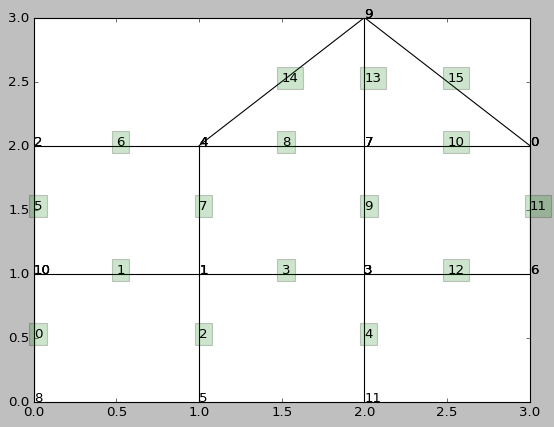

In [ ]:
PlotFrame(list(nodes), connect)

<a id = "results" />
<hr/>

### Results
Following cells will show the rest of analysis and the results expressed in nodes displacement.

In [ ]:
ops.fix(8,1,1,1)
ops.fix(5,1,1,1)
ops.fix(11,1,1,1)

In [ ]:
# Define Materials
Elastic_modulus = 1
acciaio = 1 
Iz = 1
A = 1
ops.uniaxialMaterial('Elastic',acciaio,Elastic_modulus)
IDTransf = 1
ops.geomTransf('Linear',IDTransf)

In [ ]:
for i in range(len(el_new)):
    ops.element('elasticBeamColumn',i,connect[0][i],connect[1][i],A,Elastic_modulus,Iz,IDTransf )

In [ ]:
ops.timeSeries('Linear',1)
ops.pattern('Plain', 1, 1)
ops.eleLoad('-ele',12,'-type','-beamUniform',-1.0,0.0)

In [ ]:
ops.system('BandSPD')
ops.constraints('Plain')
ops.numberer('Plain')
ops.test('NormDispIncr', 1.0e-3, 6)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')

# Run Analysis
ops.analyze(1)

0

In [ ]:
# Save a recorder for node displacements before running the analysis
displacement = []
for i in range(len(nodes)):
    displacement.append(ops.nodeDisp(i)) 
print(' ' * 20 ,'NODE DISPLACEMENT:')
for i, value in enumerate(displacement):
    print(i, value)

                     NODE DISPLACEMENT:
0 [0.5230091399878609, -1.044389262983219, -0.3733635287340604]
1 [0.14895640023871023, -0.3050189105616977, -0.29082770162470417]
2 [0.3964154053159837, -0.022721330698007382, -0.29885430465626245]
3 [0.16752781090188257, -0.6564937161348496, -0.35797281863696806]
4 [0.4669642104039088, -0.33939669172452086, -0.33712409116434017]
5 [0.0, 0.0, 0.0]
6 [0.12588666781577143, -1.0874677234746188, -0.4278216061244702]
7 [0.5132720822070772, -0.6809604380688838, -0.3463974951817436]
8 [0.0, 0.0, 0.0]
9 [0.8610910948608979, -0.6604828425815709, -0.3560271656638227]
10 [0.1245126174437176, -0.03848737330346155, -0.23319313690694882]
11 [0.0, 0.0, 0.0]


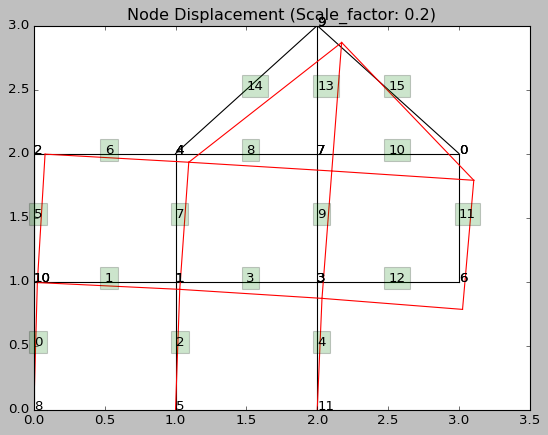

In [ ]:
PlotFrame(list(nodes), connect, displacement, 0.2)

<a id = "considerations" />
<hr/>

### Considerations
This *Colab Notebook* shows a "simple" way to import a structure from a .dxf file and analyze it using *Openseespy framework*. <br>
I usually have problems in defining nodes and elements manually, I find this way more easy to implement. <br>
N.B. Nodes information include *z* coordinate, so is it possible to adapt the code for 3D structures.